In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  1 09:56:17 2022

@author: noemi
"""

from All_functions_ML import Part_1_pre_processing,  Part_2_PCA,Part_3_kmeans_clustering,\
    apply_to_all_data, Part_0_make_subset

from Config import norm, t, resamp, length_days, wtype, kernel, degreek,   n_components, copy, whiten, svd_solver,\
    Dataset_path, perctest, perctrain, Run_PCA_Local,  name_PCA_config, path_save_PCA, path_save_clustering, n_clusters,\
    ntest, init, max_iter, algorithm, n_split, verbose, tol, sample_weight, nmb_initialisations, files, init_year,\
    final_year, delta_year, N_particles, start_lon
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


print('0/4-Generate sub-set for clustering------------------------------------')
if not os.path.exists(Dataset_path):
    Part_0_make_subset(Dataset_path, init_year,final_year, delta_year, files, length_days, N_particles)
else:
    print('This subset already exists')


0/4-Generate sub-set for clustering------------------------------------
This subset already exists


In [3]:
from All_functions_ML import *

In [4]:
print('1/4-Pre_processing------------------------------------')
X_lats_lons_valid, X_lats_lons_test, X_lats_lons_train, w_train, w_valid, w_test =  Part_1_pre_processing(Dataset_path, length_days, perctest, perctrain, False, True, False, False, 0)

1/4-Pre_processing------------------------------------
Pre_processing


In [5]:
pca = PCA(n_components=n_components, copy=copy, whiten=False, svd_solver = svd_solver)
X_reduced_train = pca.fit_transform(X_lats_lons_train)

X_reduced_valid = pca.transform(X_lats_lons_valid)
X_reduced_test  = pca.transform(X_lats_lons_test)

In [6]:
X_means = np.nanmean(X_lats_lons_train, axis = 0)

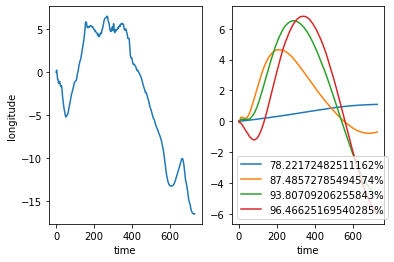

In [7]:
f = plt.figure()
comp = pca.components_ 
var = pca.singular_values_
Var_ratio = pca.explained_variance_ratio_
X_projete  = X_lats_lons_train.dot(np.transpose(comp))
n = X_lats_lons_train.shape[0]
ax = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)
s = X_means.shape[0]//2
for i in range(1):
    j  = random.randint(0, 3200)
    if not np.all(X_lats_lons_train[j, s:]==0):
        ax.plot(X_lats_lons_train[j, s:])
        for t in range(1, 5):
            to_plot = X_reduced_train[j,:t].dot(comp[:t, s:])
            ax2.plot(to_plot, label = str(np.sum(Var_ratio[:t]*100))+'%')#*var[0])

ax.set_xlabel('time')
ax2.set_xlabel('time')
ax.set_ylabel('longitude')
            
ax2.legend()

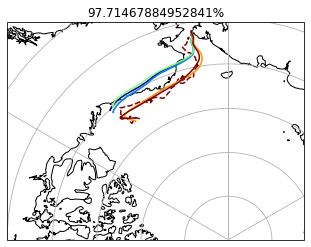

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

comp = pca.components_ 
var = pca.singular_values_
Var_ratio = pca.explained_variance_ratio_
X_projete  = X_lats_lons_train.dot(np.transpose(comp))

N = 5
C= plt.cm.jet(np.linspace(0,1,N))

f = plt.figure()
ax = f.add_subplot(1,1,1,  projection = ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
j  = random.randint(0, 3200)
ax.plot(X_lats_lons_train[j, s:]+190, X_lats_lons_train[j, :s]+66, '--', c = C[-1], transform = ccrs.PlateCarree())
for t in range(1, N+1):
    to_plot_lons = X_reduced_train[j,:t].dot(comp[:t, s:])
    to_plot_lats = X_reduced_train[j,:t].dot(comp[:t, :s])
    ax.plot(to_plot_lons+X_means[s:]+190, to_plot_lats+X_means[:s]+66,c = C[t-1], transform = ccrs.PlateCarree())
    ax.set_title( str(np.sum(Var_ratio[:t]*100))+'%')

ax.set_extent([-200, -90, 65, 90], crs=ccrs.PlateCarree())
